In [2]:
import sqlite 


ModuleNotFoundError: No module named 'sqlite'

In [1]:
import sqlite3


In [3]:
database = '/home/amrita95/Desktop/Cap8_DS_Challenge_V1/sqlite.db'

In [4]:
db = sqlite3.connect(database)
cursor = db.cursor()

In [7]:
cursor.execute('''SELECT depth,ts FROM exec''')
data = cursor.fetchall()
array= np.array(data)
depth = []
ts = []
for column in array:
    depth.append(column[0])
    ts.append(column[1])
print(ts[50:100])

[16.952999999999999, 17.960000000000001, 17.962, 17.968, 18.972999999999999, 18.975000000000001, 18.975000000000001, 19.984000000000002, 19.992999999999999, 19.994, 21.004000000000001, 21.004999999999999, 21.007000000000001, 22.010999999999999, 22.012, 22.030000000000001, 22.032, 22.068999999999999, 22.106999999999999, 22.155000000000001, 22.158999999999999, 22.158999999999999, 22.164000000000001, 22.187000000000001, 22.187000000000001, 22.187999999999999, 22.199000000000002, 22.221, 22.228000000000002, 22.247, 22.283000000000001, 22.550999999999998, 22.574000000000002, 22.603999999999999, 22.936, 23.035, 23.047000000000001, 23.052, 23.373999999999999, 24.093, 24.094000000000001, 24.097000000000001, 24.167000000000002, 24.434999999999999, 24.722999999999999, 25.114999999999998, 25.116, 25.116, 25.847000000000001, 26.125]


In [8]:
import numpy as np
import json 
cursor.execute('''SELECT rates FROM exec''')
data = cursor.fetchall()
array = np.array(data)
rate1 =[]
rate5 =[]
for column in array:
    rate1.append(json.loads(column[0])['1'])
    rate5.append(json.loads(column[0])['5'])

In [9]:
import matplotlib.pyplot as plt

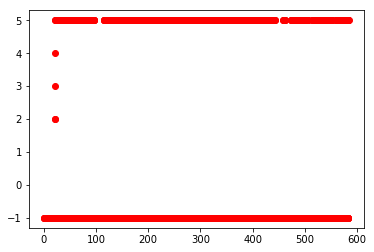

In [10]:
plt.plot(ts,depth,'ro')
plt.show()

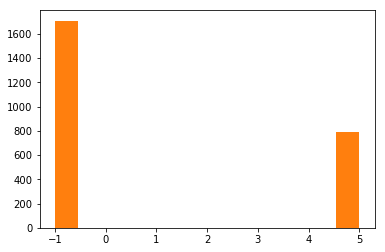

In [12]:
plt.hist(depth,bins ='auto')
plt.show()

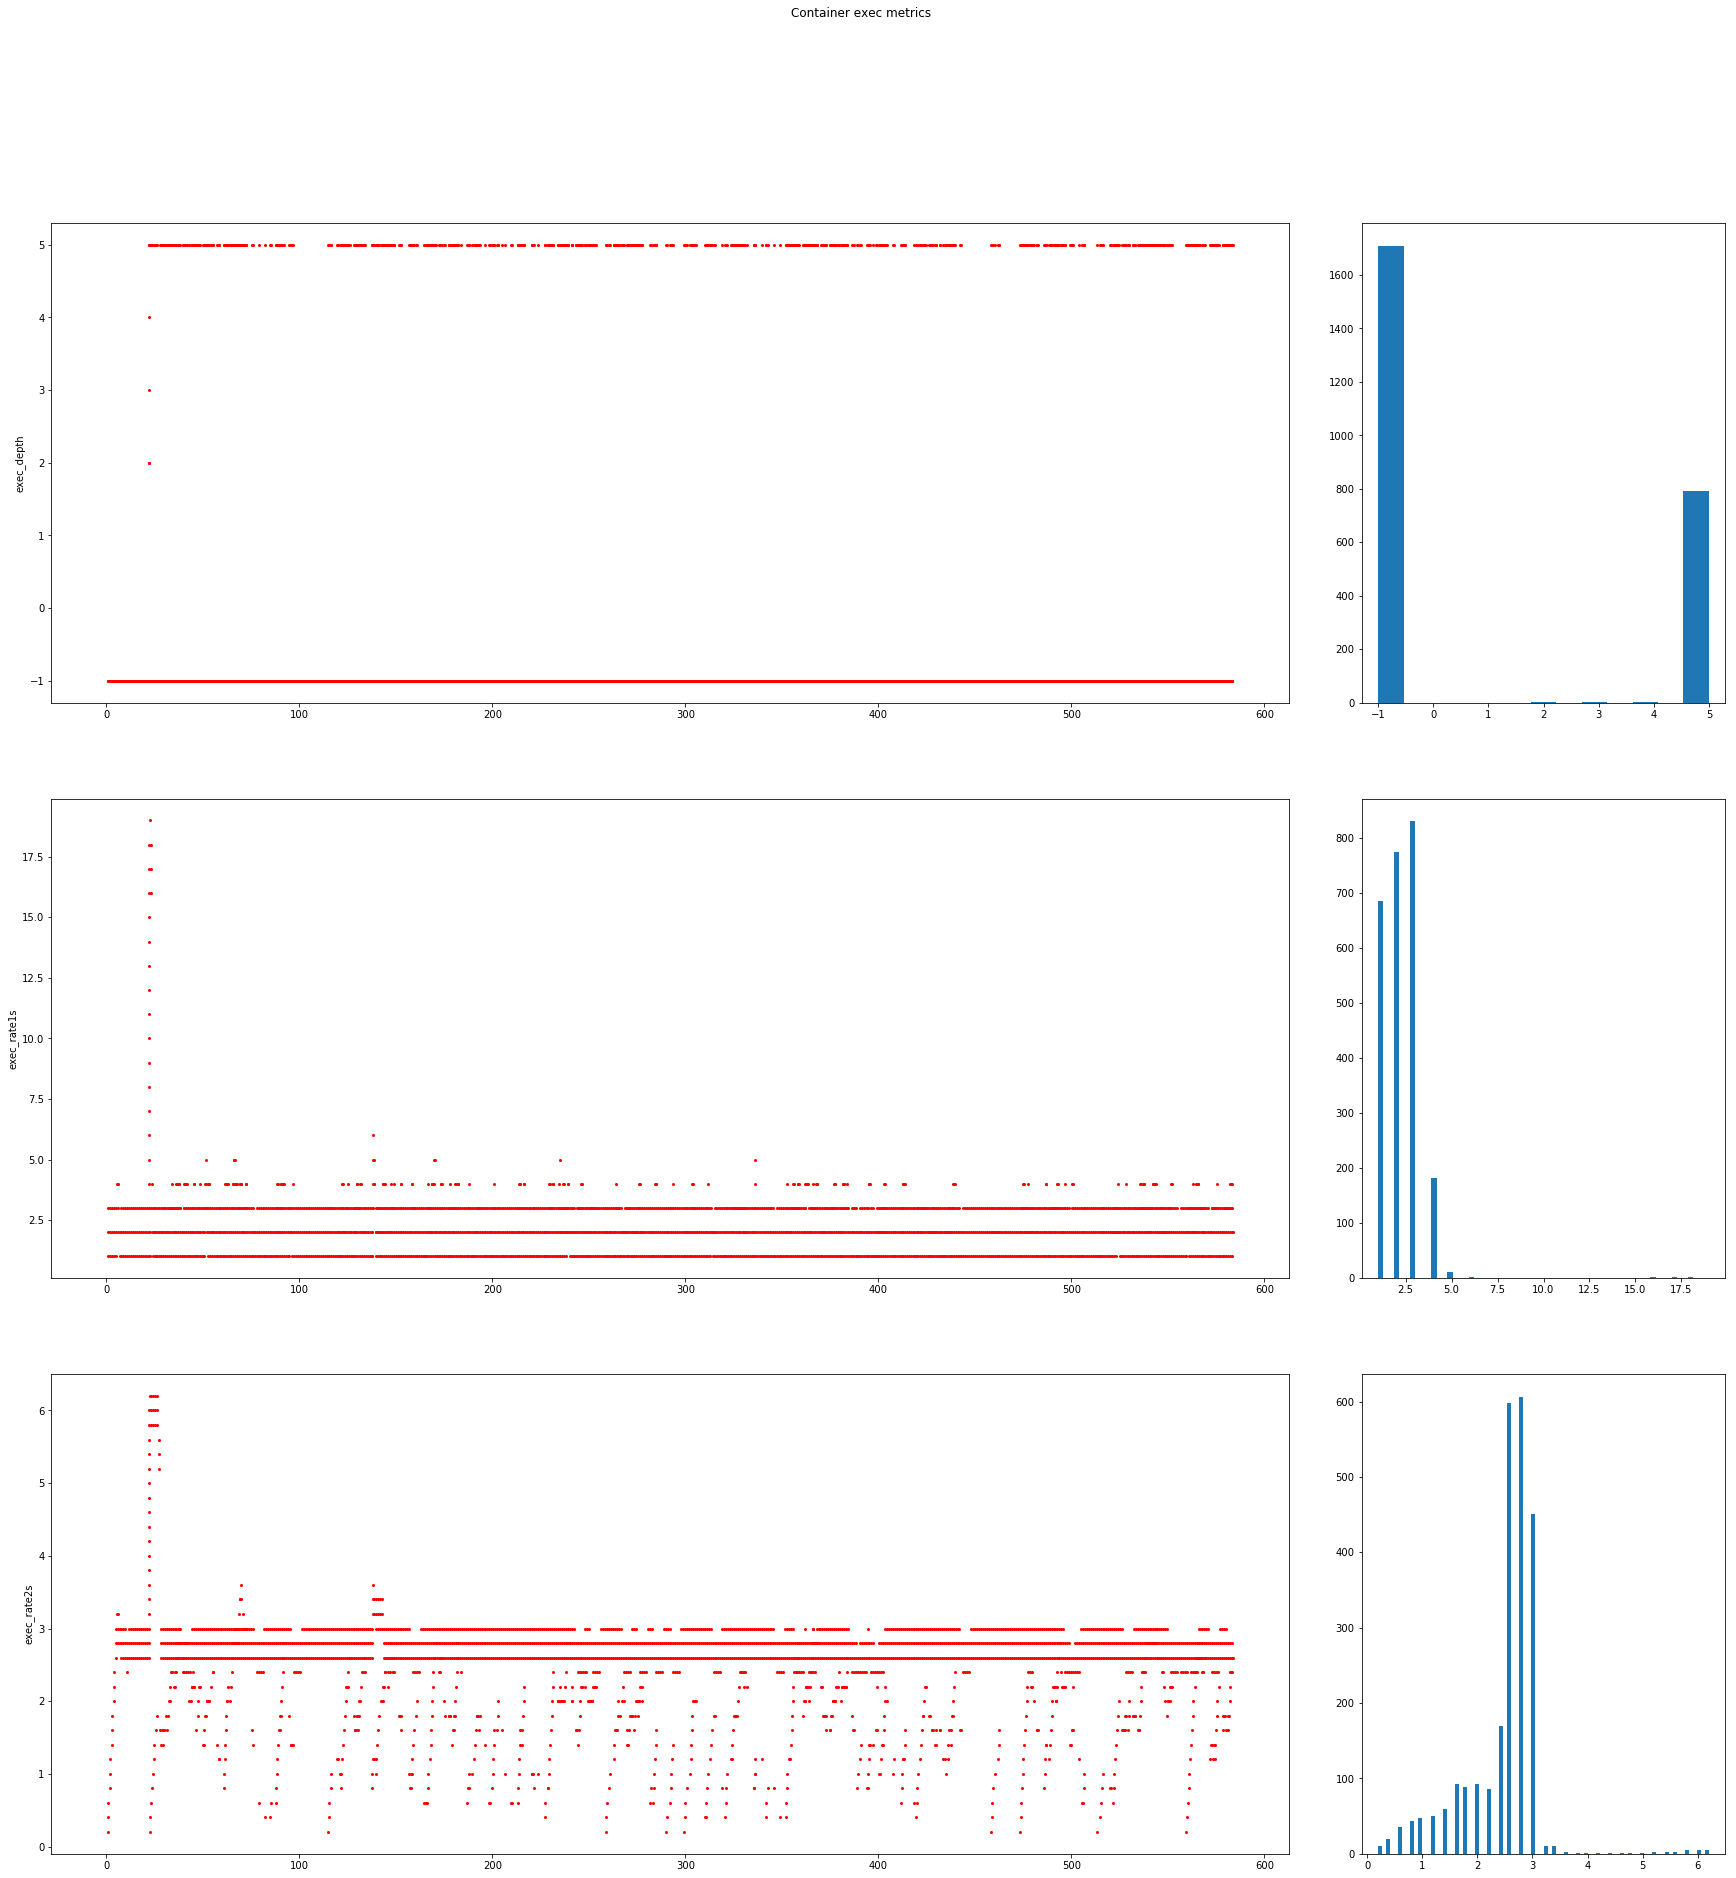

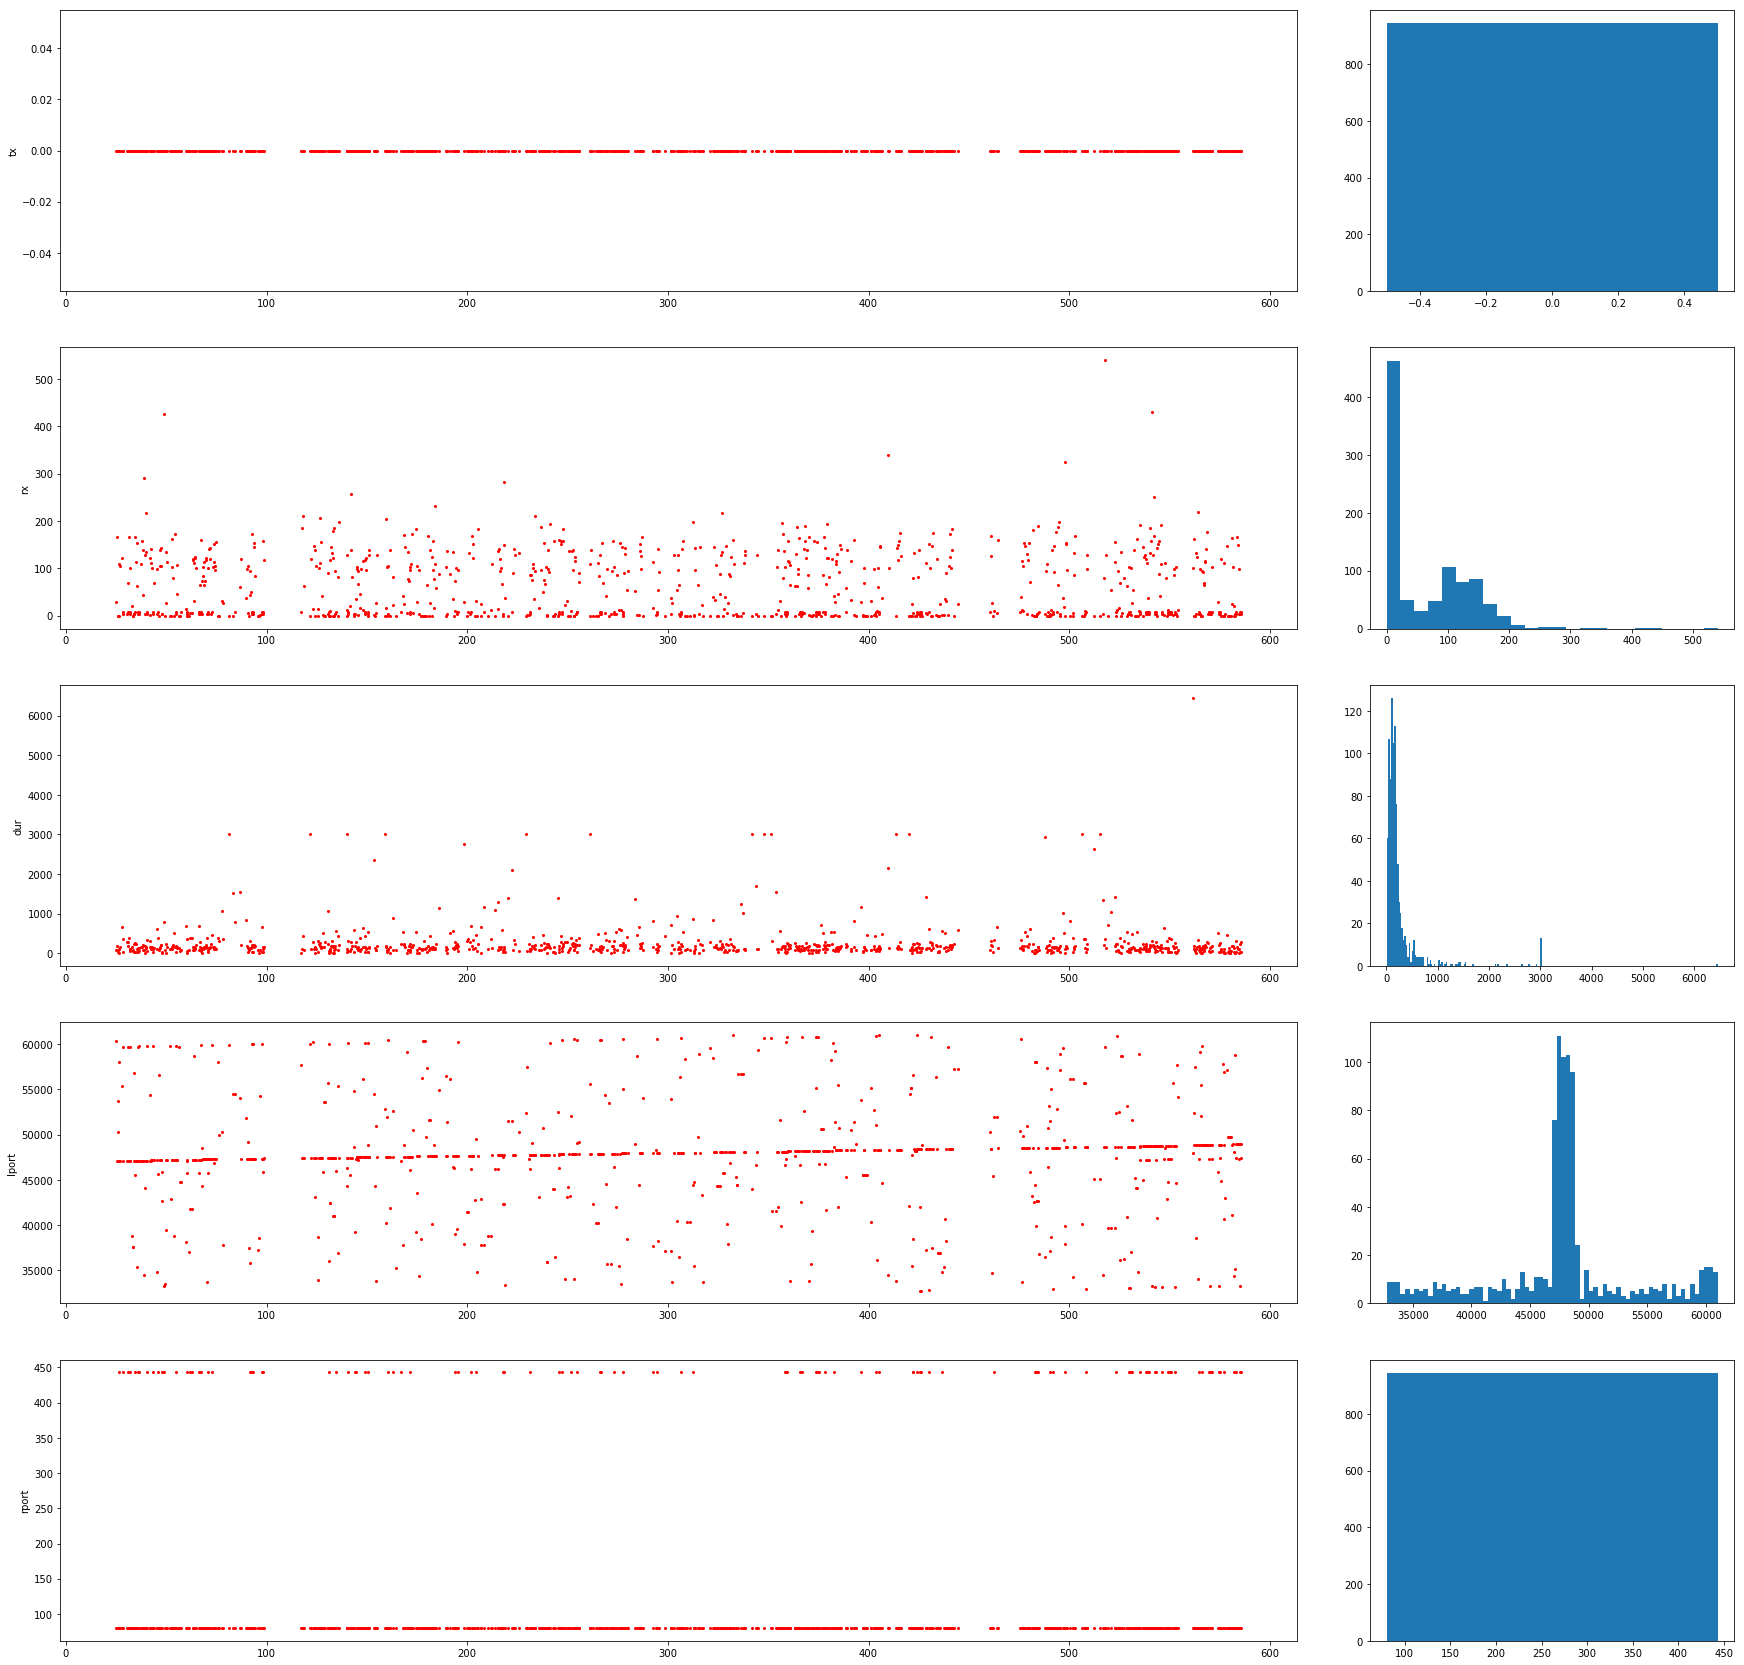

"\n#fetching rates from Table Exec\ncursor.execute(SELECT rates FROM exec)\ndata = cursor.fetchall()\narray = np.array(data)\nrate1 =[]\nrate5 =[]\nfor column in array:\n    rate1.append(json.loads(column[0])['1'])\n    rate5.append(json.loads(column[0])['5'])\n"

In [3]:
import sqlite3
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

database = '/home/amrita95/Desktop/Cap8_DS_Challenge_V1/sqlite.db'

db = sqlite3.connect(database)
cursor = db.cursor()

#fetching depth,ts data from Table Exec
cursor.execute('''SELECT depth,ts FROM exec''')
data = cursor.fetchall()
array= np.array(data)
depth = []
ts = []
for column in array:
    depth.append(column[0])
    ts.append(column[1])
ts = np.reshape(ts,[2503,-1])
depth = np.reshape(depth,[2503,-1])

#fetching rates from Table Exec
cursor.execute('''SELECT rates FROM exec''')
data = cursor.fetchall()
array = np.array(data)
rate1 =[]
rate5 =[]
for column in array:
    rate1.append(json.loads(column[0])['1'])
    rate5.append(json.loads(column[0])['5'])

#Plots and Histograms of the data
plt.figure(num=1,figsize=(30,30))
plt.suptitle('Container exec metrics')
gridspec.GridSpec(3,4)

plt.subplot2grid((3,4), (0,0), colspan=3, rowspan=1)
plt.plot(ts,depth,'ro',markersize = 2)
plt.ylabel('exec_depth')

plt.subplot2grid((3,4), (0,3))
plt.hist(depth,bins ='auto')

plt.subplot2grid((3,4), (1,0), colspan=3, rowspan=1)
plt.plot(ts,rate1,'ro',markersize = 2)
plt.ylabel('exec_rate1s')

plt.subplot2grid((3,4), (1,3))
plt.hist(rate1,bins= 'auto')

plt.subplot2grid((3,4), (2,0), colspan=3, rowspan=1)
plt.plot(ts,rate5,'ro',markersize = 2)
plt.ylabel('exec_rate2s')

plt.subplot2grid((3,4), (2,3))
plt.hist(rate5,bins='auto')


#fetching depth,ts data from Table Exec
cursor.execute('''SELECT rx,tx,dur,ts FROM tcplife''')
data2 = cursor.fetchall()
array2= np.array(data2)
rx = []
tx =[]
dur = []
ts2 = []
for column in array2:
    rx.append(column[0])
    tx.append(column[1])
    dur.append(column[2])
    ts2.append(column[3])
ts2 = np.reshape(ts2,[944,-1])
rx = np.reshape(rx,[944,-1])
tx = np.reshape(tx,[944,-1])
dur = np.reshape(dur,[944,-1])

#fetching rates from Table Exec
cursor.execute('''SELECT lport,rport FROM tcplife''')
data2 = cursor.fetchall()
array2 = np.array(data2)
lport = []
rport = []
for column in array2:
    lport.append(json.loads(column[0]))
    rport.append(json.loads(column[1]))

lport = np.reshape(lport,[944,-1])
rport = np.reshape(rport,[944,-1])

plt.figure(num=2,figsize=(30,30))
#plt.suptitle('')
gridspec.GridSpec(5,4)

plt.subplot2grid((5,4), (0,0), colspan=3, rowspan=1)
plt.plot(ts2,tx,'ro',markersize = 2)
plt.ylabel('tx')

plt.subplot2grid((5,4), (0,3))
plt.hist(tx,bins =1)

plt.subplot2grid((5,4), (1,0), colspan=3, rowspan=1)
plt.plot(ts2,rx,'ro',markersize = 2)
plt.ylabel('rx')

plt.subplot2grid((5,4), (1,3))
plt.hist(rx,bins= 'auto')

plt.subplot2grid((5,4), (2,0), colspan=3, rowspan=1)
plt.plot(ts2,dur,'ro',markersize = 2)
plt.ylabel('dur')

plt.subplot2grid((5,4), (2,3))
plt.hist(dur,bins='auto')

plt.subplot2grid((5,4), (3,0), colspan=3, rowspan=1)
plt.plot(ts2,lport,'ro',markersize = 2)
plt.ylabel('lport')

plt.subplot2grid((5,4), (3,3))
plt.hist(lport,bins='auto')

plt.subplot2grid((5,4), (4,0), colspan=3, rowspan=1)
plt.plot(ts2,rport,'ro',markersize = 2)
plt.ylabel('rport')

plt.subplot2grid((5,4), (4,3))
plt.hist(rport,bins='auto')

plt.show()
'''
#fetching rates from Table Exec
cursor.execute(''''''SELECT rates FROM exec'''''')
data = cursor.fetchall()
array = np.array(data)
rate1 =[]
rate5 =[]
for column in array:
    rate1.append(json.loads(column[0])['1'])
    rate5.append(json.loads(column[0])['5'])
'''
